In [418]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import geopandas as gpd
import folium
from shapely.geometry import Point

1. A dataset containing details about Metro Nashville Police Department reported incidents is available at https://data.nashville.gov/Police/Metro-Nashville-Police-Department-Incidents/2u6v-ujjs. Make use of the API to find all aggravated burglary incidents that were reported during the six month period from January 1, 2021 through June 30, 2021.

In [434]:
endpoint = ('https://data.nashville.gov/resource/2u6v-ujjs.json?$limit=50000')
parameters = {
    '$where': 'incident_reported between "2021-01-01T00:00:00" and "2021-06-30T23:59:59"',
    'offense_description' : "BURGLARY- AGGRAVATED"
}

response = requests.get(endpoint, params = parameters)

In [435]:
response

<Response [200]>

In [436]:
#Calling MetroPD df
agg_burg = (pd.read_json(response.text)
            .drop_duplicates(subset = "incident_number"))

agg_burg = agg_burg[['incident_reported', 'offense_description']]
agg_burg

,incident_reported,offense_description
0,2021-05-05T00:45:00.000,BURGLARY- AGGRAVATED
1,2021-05-04T14:33:00.000,BURGLARY- AGGRAVATED
2,2021-05-02T12:40:00.000,BURGLARY- AGGRAVATED
3,2021-05-02T11:57:00.000,BURGLARY- AGGRAVATED
5,2021-05-04T09:50:00.000,BURGLARY- AGGRAVATED
...,...,...
1046,2021-01-16T02:36:00.000,BURGLARY- AGGRAVATED
1047,2021-02-06T18:19:00.000,BURGLARY- AGGRAVATED
1048,2021-03-05T13:33:00.000,BURGLARY- AGGRAVATED
1049,2021-03-03T23:12:00.000,BURGLARY- AGGRAVATED


In [437]:
response = requests.get('https://data.nashville.gov/resource/2u6v-ujjs.json?offense_description=BURGLARY- AGGRAVATED&\
$where=incident_reported between "2021-01-01T00:00:00.000" and "2021-06-30T00:00:00.000"')

agg_burg = (pd.read_json(response.text)
            .drop_duplicates(subset = "incident_number"))


In [438]:
agg_burg = agg_burg[['incident_reported', 'latitude', 'longitude', 'offense_description']]
agg_burg

,incident_reported,latitude,longitude,offense_description
0,2021-05-05T00:45:00.000,36.150,-86.770,BURGLARY- AGGRAVATED
1,2021-05-04T14:33:00.000,36.200,-86.630,BURGLARY- AGGRAVATED
2,2021-05-02T12:40:00.000,36.140,-86.780,BURGLARY- AGGRAVATED
3,2021-05-02T11:57:00.000,36.140,-86.780,BURGLARY- AGGRAVATED
5,2021-05-04T09:50:00.000,36.110,-86.730,BURGLARY- AGGRAVATED
...,...,...,...,...
993,2021-02-07T05:03:00.000,36.167,-86.763,BURGLARY- AGGRAVATED
996,2021-04-13T12:13:00.000,36.164,-86.781,BURGLARY- AGGRAVATED
997,2021-02-17T10:19:00.000,36.140,-86.890,BURGLARY- AGGRAVATED
998,2021-02-28T21:39:00.000,36.060,-86.640,BURGLARY- AGGRAVATED


2. Download the 2019 census tract shapefiles for Tennessee from https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2019.html. (The FIPS code for Tennessee is 47). Perform a spatial join to determine the census tract in which each burglary incident occurred. Which census tract had the highest number of burglaries? Warning - each incident can appear multiple times if there are multiple victims, so be sure that you aren't double-counting any incidents.

In [439]:
geometry = [Point(xy) for xy in zip(agg_burg['longitude'], agg_burg['latitude'])] #creating geometry column
geo_burg = gpd.GeoDataFrame(agg_burg, crs = "EPSG:4269", geometry = geometry)
geo_burg

,incident_reported,latitude,longitude,offense_description,geometry
0,2021-05-05T00:45:00.000,36.150,-86.770,BURGLARY- AGGRAVATED,POINT (-86.77000 36.15000)
1,2021-05-04T14:33:00.000,36.200,-86.630,BURGLARY- AGGRAVATED,POINT (-86.63000 36.20000)
2,2021-05-02T12:40:00.000,36.140,-86.780,BURGLARY- AGGRAVATED,POINT (-86.78000 36.14000)
3,2021-05-02T11:57:00.000,36.140,-86.780,BURGLARY- AGGRAVATED,POINT (-86.78000 36.14000)
5,2021-05-04T09:50:00.000,36.110,-86.730,BURGLARY- AGGRAVATED,POINT (-86.73000 36.11000)
...,...,...,...,...,...
993,2021-02-07T05:03:00.000,36.167,-86.763,BURGLARY- AGGRAVATED,POINT (-86.76300 36.16700)
996,2021-04-13T12:13:00.000,36.164,-86.781,BURGLARY- AGGRAVATED,POINT (-86.78100 36.16400)
997,2021-02-17T10:19:00.000,36.140,-86.890,BURGLARY- AGGRAVATED,POINT (-86.89000 36.14000)
998,2021-02-28T21:39:00.000,36.060,-86.640,BURGLARY- AGGRAVATED,POINT (-86.64000 36.06000)


In [440]:
census.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [441]:
census = gpd.read_file("./tl_2019_47_tract/tl_2019_47_tract.shp")

In [442]:
agg_burg_geo= gpd.GeoDataFrame(agg_burg, 
                           crs = census.crs, 
                           geometry = agg_burg['geometry'])

In [443]:
agg_burg_geo

,incident_reported,latitude,longitude,offense_description,geometry
0,2021-05-05T00:45:00.000,36.150,-86.770,BURGLARY- AGGRAVATED,POINT (-86.77000 36.15000)
1,2021-05-04T14:33:00.000,36.200,-86.630,BURGLARY- AGGRAVATED,POINT (-86.63000 36.20000)
2,2021-05-02T12:40:00.000,36.140,-86.780,BURGLARY- AGGRAVATED,POINT (-86.78000 36.14000)
3,2021-05-02T11:57:00.000,36.140,-86.780,BURGLARY- AGGRAVATED,POINT (-86.78000 36.14000)
5,2021-05-04T09:50:00.000,36.110,-86.730,BURGLARY- AGGRAVATED,POINT (-86.73000 36.11000)
...,...,...,...,...,...
993,2021-02-07T05:03:00.000,36.167,-86.763,BURGLARY- AGGRAVATED,POINT (-86.76300 36.16700)
996,2021-04-13T12:13:00.000,36.164,-86.781,BURGLARY- AGGRAVATED,POINT (-86.78100 36.16400)
997,2021-02-17T10:19:00.000,36.140,-86.890,BURGLARY- AGGRAVATED,POINT (-86.89000 36.14000)
998,2021-02-28T21:39:00.000,36.060,-86.640,BURGLARY- AGGRAVATED,POINT (-86.64000 36.06000)


In [325]:
for col in census.columns:
    print(col)

STATEFP
COUNTYFP
TRACTCE
GEOID
NAME
NAMELSAD
MTFCC
FUNCSTAT
ALAND
AWATER
INTPTLAT
INTPTLON
geometry


In [562]:
census = census[['NAMELSAD', 'TRACTCE', 'geometry']]

In [563]:
census

,NAMELSAD,TRACTCE,geometry
0,Census Tract 210.02,021002,"POLYGON ((-86.69927 36.32775, -86.69923 36.327..."
1,Census Tract 209.01,020901,"POLYGON ((-86.43949 36.35962, -86.43915 36.359..."
2,Census Tract 203,020300,"POLYGON ((-86.53716 36.56852, -86.53713 36.568..."
3,Census Tract 209.02,020902,"POLYGON ((-86.47106 36.38238, -86.47081 36.382..."
4,Census Tract 208,020800,"POLYGON ((-86.48786 36.37320, -86.48783 36.373..."
...,...,...,...
1492,Census Tract 221.12,022112,"POLYGON ((-90.01257 35.02328, -90.01256 35.023..."
1493,Census Tract 505.01,050501,"POLYGON ((-82.85011 36.54107, -82.84955 36.541..."
1494,Census Tract 506.01,050601,"POLYGON ((-82.68939 36.58793, -82.68936 36.588..."
1495,Census Tract 506.02,050602,"POLYGON ((-82.69446 36.54856, -82.69445 36.548..."


In [571]:
agg_burg_census = gpd.sjoin(agg_burg_geo, census, op = 'within')
agg_burg_census.rename[['TRACTCE':'tract']]

SyntaxError: invalid syntax (Temp/ipykernel_13056/3728234842.py, line 2)

In [565]:
agg_burg_census.NAMELSAD.mode()

0    Census Tract 163
dtype: object

3. For this part, you'll need to request a census API key. Using the 2019 American Community Survey API, obtain, for each census tract, the population (B01001_001E in the detailed tables) and the median income (S1901_C01_012E in the subject tables). Hint: Tennessee's FIPS code is 47 and Davidson County's FIPS code is 37. Merge this new data with the burglaries data above.

In [447]:
with open("./census.json") as fi:
    credentials = json.load(fi)
api_key = credentials["api_key"]


In [542]:
endpoint = 'https://api.census.gov/data/2019/acs/acs5/'
parameters = {
    'get': 'NAME,B01001_001E',
    'for':'tract:*',   #all tracts
    'in':'state:47 county:037' #TN and Davidson County 
}
  
response = requests.get(endpoint, params= parameters )

In [543]:
response

<Response [200]>

In [544]:
census_pop = (pd.read_json(response.text))
header = census_pop.iloc[0]
census_pop = census_pop[1:]
census_pop.columns = header

In [545]:
census_pop

,NAME,B01001_001E,state,county,tract
1,"Census Tract 156.31, Davidson County, Tennessee",12176,47,037,015631
2,"Census Tract 158.04, Davidson County, Tennessee",4098,47,037,015804
3,"Census Tract 177.01, Davidson County, Tennessee",2466,47,037,017701
4,"Census Tract 177.02, Davidson County, Tennessee",5210,47,037,017702
5,"Census Tract 183.01, Davidson County, Tennessee",8254,47,037,018301
...,...,...,...,...,...
157,"Census Tract 156.13, Davidson County, Tennessee",5252,47,037,015613
158,"Census Tract 156.20, Davidson County, Tennessee",7262,47,037,015620
159,"Census Tract 161, Davidson County, Tennessee",2345,47,037,016100
160,"Census Tract 114, Davidson County, Tennessee",4617,47,037,011400


In [547]:
endpoint = 'https://api.census.gov/data/2019/acs/acs5/subject'
parameters = {
    'get': 'NAME,S1901_C01_012E',
    'for':'tract:*',   #all tracts
    'in':'state:47 county:037' #TN and Davidson County 
}
  
response = requests.get(endpoint, params= parameters )

In [549]:
census_income = (pd.read_json(response.text))
header = census_income.iloc[0]
census_income = census_income[1:]
census_income.columns = header


In [550]:
census_income

,NAME,S1901_C01_012E,state,county,tract
1,"Census Tract 156.31, Davidson County, Tennessee",75579,47,037,015631
2,"Census Tract 158.04, Davidson County, Tennessee",45129,47,037,015804
3,"Census Tract 177.01, Davidson County, Tennessee",134786,47,037,017701
4,"Census Tract 177.02, Davidson County, Tennessee",107813,47,037,017702
5,"Census Tract 183.01, Davidson County, Tennessee",87591,47,037,018301
...,...,...,...,...,...
157,"Census Tract 156.13, Davidson County, Tennessee",37656,47,037,015613
158,"Census Tract 156.20, Davidson County, Tennessee",54149,47,037,015620
159,"Census Tract 161, Davidson County, Tennessee",48221,47,037,016100
160,"Census Tract 114, Davidson County, Tennessee",50857,47,037,011400


In [551]:
census_data = pd.merge(census_pop, census_income, how='inner')

In [554]:
census_data.rename(columns={'B01001_001E': 'population', 'S1901_C01_012E':'median income'})

,NAME,population,state,county,tract,median income
0,"Census Tract 156.31, Davidson County, Tennessee",12176,47,037,015631,75579
1,"Census Tract 158.04, Davidson County, Tennessee",4098,47,037,015804,45129
2,"Census Tract 177.01, Davidson County, Tennessee",2466,47,037,017701,134786
3,"Census Tract 177.02, Davidson County, Tennessee",5210,47,037,017702,107813
4,"Census Tract 183.01, Davidson County, Tennessee",8254,47,037,018301,87591
...,...,...,...,...,...,...
156,"Census Tract 156.13, Davidson County, Tennessee",5252,47,037,015613,37656
157,"Census Tract 156.20, Davidson County, Tennessee",7262,47,037,015620,54149
158,"Census Tract 161, Davidson County, Tennessee",2345,47,037,016100,48221
159,"Census Tract 114, Davidson County, Tennessee",4617,47,037,011400,50857


In [569]:
census_data_burglaries = pd.merge(agg_burg_census, census_data, how='left_on=None')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

4. Create a choropleth showing the number of burglaries per 1000 residents for each census tract.

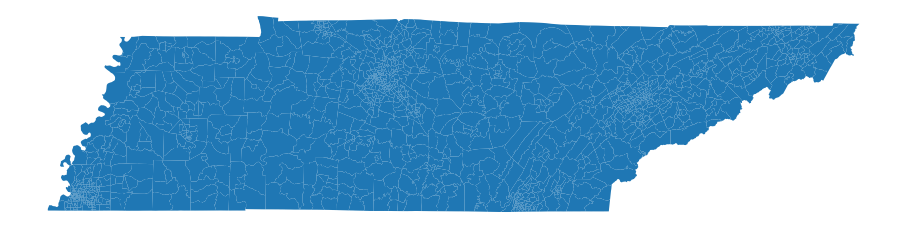

In [396]:
fig, ax = plt.subplots(figsize=(16,4))
census.plot(ax = ax)
ax.axis('off');

<AxesSubplot:>

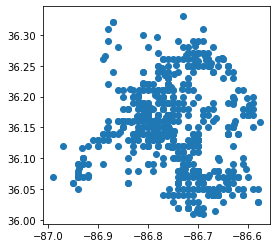

In [400]:
agg_burg_census.plot()

AttributeError: 'GeoDataFrame' object has no attribute 'agg_burg_census'

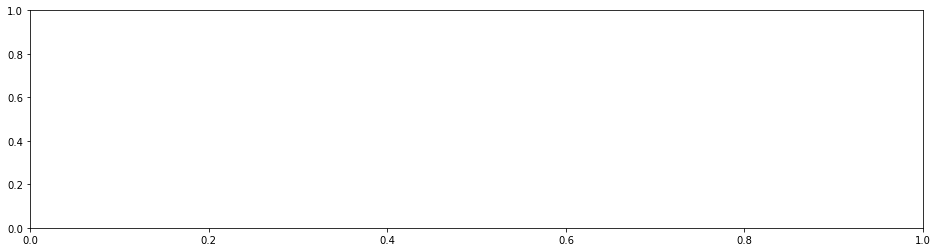

In [401]:
fig, ax = plt.subplots(figsize=(16,4))
census.agg_burg_census.plot(column = '')
ax.axis('off');

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
census.plot(ax = ax)
ax.axis('off');

In [410]:
from scipy.stats import poisson 

ModuleNotFoundError: No module named 'scipy'